In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("data.csv", header=None, names=['x','y'])
train_data, test_data = train_test_split(data, test_size=0.3)

X_train = np.array(train_data['x'])
y_train = np.array(train_data['y'])
X_test = np.array(test_data['x'])
y_test = np.array(test_data['y'])

We will normalize our data by scaling them to a range thus implementing the following formula:
$$
    x_{norm} = \dfrac{(x - x_{min})}{(x_{max} - x_{min})}
$$
[Source](https://developers.google.com/machine-learning/data-prep/transform/normalization#scaling-to-a-range)


In [3]:
from utils import normalize, add_bias

# normalizing x
X_train_norm = normalize(X_train)

# adding bias (=1) as a feature
X_train_norm_bias = add_bias(X_train_norm)

# normalizing y
y_train_norm = normalize(y_train)


X_test_norm = normalize(X_test)
X_test_norm_bias = add_bias(X_test_norm)
y_test_norm = normalize(y_test)

In [4]:
# Calclute theta
def calc_theta(X, y):
    return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# Calculate h_theta(X)
def calc_h_theta(X, theta):
    h_theta = np.dot(X, theta)
    return h_theta

# aka J(theta) - cost function
def cal_cost(y, y_pred):
    m = y.shape[0]
    return (1/m) * np.sum((y_pred - y)**2)
    # second approach
    # return np.mean((actual - predicted)**2)
    

In [5]:
theta = calc_theta(X_train_norm_bias, y_train_norm)
y_pred_train = calc_h_theta(X_train_norm_bias, theta)
cost_train = cal_cost(y_train_norm, y_pred_train)

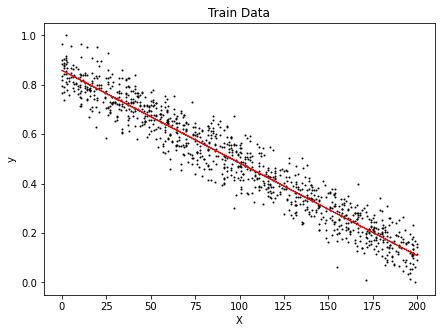

In [6]:
plt.figure(figsize=(7,5))
plt.plot(X_train, y_train_norm, "ko", markersize=1)
plt.plot(X_train, y_pred_train, "r-", linewidth=1)
plt.title("Train Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

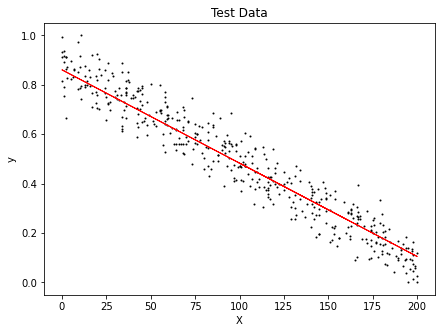

In [210]:
y_pred_test = calc_h_theta(X_test_norm_bias, theta)
cost_test = cal_cost(y_test_norm, y_pred_test)

plt.figure(figsize=(7,5))
plt.plot(X_test, y_test_norm, "ko", markersize=1)
plt.plot(X_test, y_pred_test, "r-", linewidth=1)
plt.title("Test Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [211]:
from IPython.display import Latex

print('The parameter values (theta0 & theta1): {} and {}'.format(theta.flatten()[0], theta.flatten()[1]))
print('Train cost(mse): {}'.format(cost_train))
print('Test cost(mse): {}'.format(cost_test))
print('Decision boundry with the format of "y = ax + b":')
Latex(f"""\\begin{{equation*}}
\\hat{{y}} = {{{theta.flatten()[1]}}}x_1 + {{{theta.flatten()[0]}}}
\\end{{equation*}}
""")

The parameter values (theta0 & theta1): 0.8605242980143177 and -0.755226758468301
Train cost(mse): 0.0036590709231982695
Test cost(mse): 0.0043714804241816695
Decision boundry with the format of "y = ax + b":


<IPython.core.display.Latex object>